# ***Importing the required ***

In [35]:
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

**Definition of Functions¶**

In [36]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])

    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message


In [37]:
data=[]
conversation='/content/WhatsApp Chat with Coding Raja Internship.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

**analyse the sentiments**

In [39]:
import pandas as pd
import re
from datetime import datetime

# Load the WhatsApp chat data
file_path ='/content/WhatsApp Chat with Coding Raja Internship.txt'
# Initialize lists to store the extracted data"
dates = []
times = []
contacts = []
messages = []

# Read the file and extract the information
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Check for the standard WhatsApp message pattern
        match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}\s[APM]{2}) - ([^:]+): (.+)', line)
        if match:
            dates.append(match.group(1))
            times.append(match.group(2))
            contacts.append(match.group(3))
            messages.append(match.group(4))

# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Time': times, 'Contact': contacts, 'Message': messages})

# Convert 'Date' and 'Time' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.time

# Display the first few rows of the DataFrame
print(df.head())


        Date      Time                 Contact  \
0 2024-05-15  11:30:00           RajKumar Naik   
1 2024-05-15  11:31:00           RajKumar Naik   
2 2024-05-15  11:31:00  Coding Raja Internship   
3 2024-05-15  11:31:00           RajKumar Naik   
4 2024-05-15  11:31:00           RajKumar Naik   

                                             Message  
0                                               null  
1                                    <Media omitted>  
2  Please fill 👉 whatsform.com/infytn to solve Yo...  
3                                    <Media omitted>  
4                                    <Media omitted>  


In [41]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already done
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each message
df['Positive'] = df['Message'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
df['Negative'] = df['Message'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
df['Neutral'] = df['Message'].apply(lambda x: sentiments.polarity_scores(x)['neu'])

# Display the first few rows with sentiment scores
print(df.head())


        Date      Time                 Contact  \
0 2024-05-15  11:30:00           RajKumar Naik   
1 2024-05-15  11:31:00           RajKumar Naik   
2 2024-05-15  11:31:00  Coding Raja Internship   
3 2024-05-15  11:31:00           RajKumar Naik   
4 2024-05-15  11:31:00           RajKumar Naik   

                                             Message  Positive  Negative  \
0                                               null     0.000       0.0   
1                                    <Media omitted>     0.000       0.0   
2  Please fill 👉 whatsform.com/infytn to solve Yo...     0.451       0.0   
3                                    <Media omitted>     0.000       0.0   
4                                    <Media omitted>     0.000       0.0   

   Neutral  
0    1.000  
1    1.000  
2    0.549  
3    1.000  
4    1.000  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# Calculate the total sentiment scores
x = df["Positive"].sum()
y = df["Negative"].sum()
z = df["Neutral"].sum()

# Define the score function to determine overall sentiment
def score(a, b, c):
    if (a > b) and (a > c):
        print("Positive")
    elif (b > a) and (b > c):
        print("Negative")
    elif (c > a) and (c > b):
        print("Neutral")

# Determine the overall sentiment
score(x, y, z)

Neutral


In [44]:
df.Contact.unique()

array(['RajKumar Naik', 'Coding Raja Internship'], dtype=object)

In [27]:
media_messages = df[df['Message'] == 'Oke'].shape[0]
print(media_messages)

0


In [45]:
def split_count(text):
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            [].append(word)

    return []

In [46]:
import regex

def split_count(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', regex.UNICODE)
    return emoji_pattern.findall(text)


In [47]:
# Apply the function to extract emojis
df["emoji"] = df["Message"].apply(split_count)

# Calculate the total number of emojis in the dataset
emojis = sum(df['emoji'].str.len())

# Display the first 50 rows with the emojis extracted
df.head(50)


,Date,Time,Contact,Message,Positive,Negative,Neutral,emoji
0,2024-05-15,11:30:00,RajKumar Naik,null,0.000,0.0,1.000,[]
1,2024-05-15,11:31:00,RajKumar Naik,<Media omitted>,0.000,0.0,1.000,[]
2,2024-05-15,11:31:00,Coding Raja Internship,Please fill 👉 whatsform.com/infytn to solve Yo...,0.451,0.0,0.549,[👉]
3,2024-05-15,11:31:00,RajKumar Naik,<Media omitted>,0.000,0.0,1.000,[]
4,2024-05-15,11:31:00,RajKumar Naik,<Media omitted>,0.000,0.0,1.000,[]
5,2024-05-15,11:37:00,RajKumar Naik,*Contact Form*,0.000,0.0,1.000,"[*, *]"
6,2024-06-06,14:11:00,RajKumar Naik,This certificate is aicte certified or not,0.000,0.0,1.000,[]
7,2024-06-06,16:34:00,Coding Raja Internship,Aicte verified,0.000,0.0,1.000,[]
8,2024-06-06,16:34:00,Coding Raja Internship,Check Now?,0.000,0.0,1.000,[]
9,2024-06-06,16:42:00,RajKumar Naik,Tq,0.000,0.0,1.000,[]


In [48]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('2', 5)
('0', 4)
('🙏', 3)
('3', 3)
('*', 2)
('8', 2)
('5', 2)
('7', 2)
('👉', 1)
('4', 1)


There are 2128 words in all the messages.


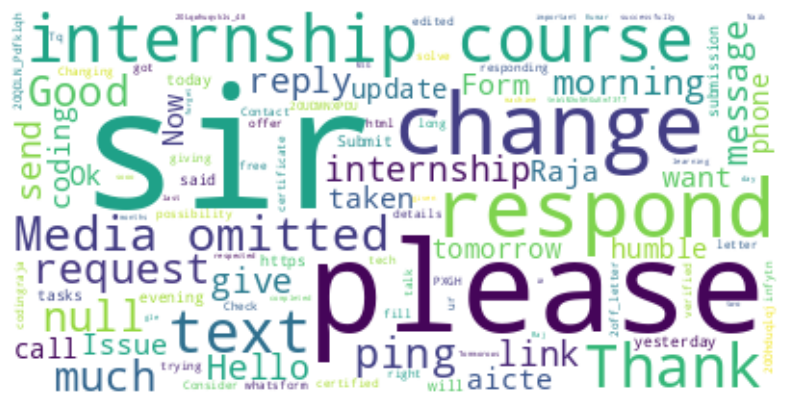

In [49]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()